# Block 1

In [8]:
# i will load the dataset
import pandas as pd
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
X = pd.DataFrame(diabetes.data,columns=diabetes.feature_names)
y = diabetes.target

# Block 2

In [9]:
# i will import other necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.linalg import inv
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Block 3

In [10]:
# i will create a function
def model_data(xdata, ydata):
  """ this function will split the x and y into train and test, fit a linear regression model, get the predicted y data, and output the model fit
  input: x and y
  output: model fit
  """
  X_train, X_test, y_train, y_test = train_test_split(xdata,ydata,random_state=1)

  model = LinearRegression()
  model.fit(X_train,y_train)
  trainingr2 = model.score(X_train,y_train)
  testingr2 = model.score(X_test,y_test)

  print('training r^2', trainingr2)
  print('testing r^2', testingr2)

  # # looking at test
  # y_model = model.predict(X_test)

  # # compare y_model to y_test
  
  # fig, axes = plt.subplots(X_train.shape[1], 1, figsize = [8, 12])
  # plt.tight_layout()

  # if X_train.shape[1] == 1:
  #   sns.scatterplot(x = X_test[X_test.columns[0]],y = y_test, ax = axes)
  #   sns.lineplot(x = X_test[X_test.columns[0]],y = y_model,color='r', ax = axes)
  return testingr2, X_train, X_test, y_train, y_test

  # # when subplots(1, 1), axes can not be indexed

  # coef_string = ' '
  # for i in range(X_train.shape[1]):
  #   sns.scatterplot(x = X_test[X_test.columns[i]],y = y_test, ax = axes[i])
  #   sns.lineplot(x = X_test[X_test.columns[i]],y = y_model,color='r', ax = axes[i])

  #   coef_string = coef_string + ' ' + str(np.round(model.coef_[i], 3)) + '*' + X_test.columns[i] + '+'

  # print('y = ', coef_string, np.round(model.intercept_, 3))

# Block 4

In [11]:
# i will show that this function works
model_data(X, y);

training r^2 0.535916157695912
testing r^2 0.443974132650792


# Block 5

In [12]:
# i will use the function to find the single best feature
r2 = []
for column in X.columns:
  testingr2, X_train, X_test, y_train, y_test = model_data(X[[column]], y)
  thisr2 = testingr2
  r2.append(thisr2)

# finding the max r^2 value
print('The single best feature is: ', X.columns[np.where(r2 == max(r2))])

training r^2 0.045384727639879774
testing r^2 -0.011092244658333694
training r^2 0.0017198871797380333
testing r^2 -0.004657205501040096
training r^2 0.38880250430560737
testing r^2 0.17466209865339177
training r^2 0.1964839686305333
testing r^2 0.18390082705313726
training r^2 0.04168667199614595
testing r^2 0.05003179316202577
training r^2 0.02470761499669738
testing r^2 0.04248875852908429
training r^2 0.17017321772012173
testing r^2 0.09411124480311595
training r^2 0.19338632561329683
testing r^2 0.15094928794177753
training r^2 0.32597994540659747
testing r^2 0.29630801377437443
training r^2 0.15228926762626183
testing r^2 0.12046966383556679
The single best feature is:  Index(['s5'], dtype='object')


# Block 6

<bound method Figure.tight_layout of <Figure size 720x360 with 2 Axes>>

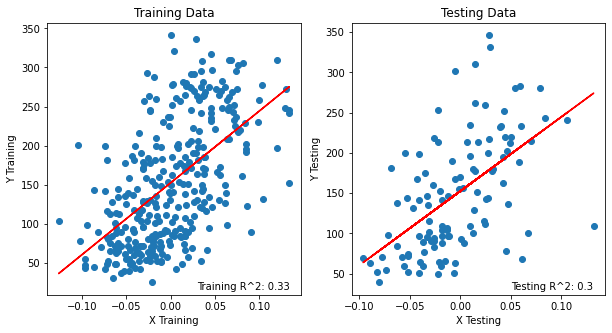

In [14]:
# i will create new x and y values using the x that best predicts y
X = X[['s5']]
y = y

# i will split my data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# i will use object oriented programming to plot the data
model = LinearRegression()
model.fit(X_train, y_train)

y_model_train = model.predict(X_train)
y_model_test = model.predict(X_test)

trainingr2 = model.score(X_train,y_train)
testingr2 = model.score(X_test,y_test)

fig, axes = plt.subplots(1, 2, figsize = [10, 5])
axes = axes.flatten()

# training plot
axes[0].scatter(X_train, y_train)
axes[0].plot(X_train, y_model_train, color = 'r')
axes[0].set_xlabel('X Training')
axes[0].set_ylabel('Y Training')
axes[0].set_title('Training Data')
axes[0].text(.03, 15, 'Training R^2: ' + str(round(trainingr2, 2)))


# testing plot
axes[1].scatter(X_test, y_test)
axes[1].plot(X_test, y_model_test, color = 'r')
axes[1].set_xlabel('X Testing')
axes[1].set_ylabel('Y Testing')
axes[1].set_title('Testing Data')
axes[1].text(.05, 30, 'Testing R^2: ' + str(round(testingr2, 2)))

fig.tight_layout

# Block 7

training r^2 0.32597994540659747
testing r^2 0.29630801377437443
training r^2 0.32597994540659747
testing r^2 0.29630801377437443


<bound method Figure.tight_layout of <Figure size 720x360 with 2 Axes>>

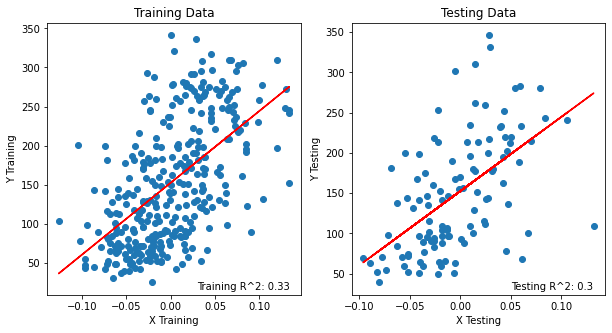

In [16]:
# i will do steps 5 and 6 inside a for loop 
# step 5
r2 = []

for column in X.columns:
  testingr2, X_train, X_test, y_train, y_test = model_data(X[[column]], y)
  thisr2 = testingr2
  r2.append(thisr2)
  best = X.columns[np.where(r2 == max(r2))]

  X1 = X[best]
  y = y

  X_train, X_test, y_train, y_test = train_test_split(X1,y,random_state=1)

  model = LinearRegression()
  model.fit(X_train,y_train)

  print('training r^2',model.score(X_train,y_train))
  print('testing r^2',model.score(X_test,y_test))

  y_model = model.predict(X_test)

  fig, axes = plt.subplots(X_train.shape[1], 2, figsize = [10, 5])
  axes = axes.flatten()
  axes[0].scatter(X_train, y_train)
  axes[0].plot(X_train, y_model_train, color = 'r')
  axes[0].set_xlabel('X Training')
  axes[0].set_ylabel('Y Training')
  axes[0].set_title('Training Data')
  axes[0].text(.03, 15, 'Training R^2: ' + str(round(trainingr2, 2)))


  # testing plot
  axes[1].scatter(X_test, y_test)
  axes[1].plot(X_test, y_model_test, color = 'r')
  axes[1].set_xlabel('X Testing')
  axes[1].set_ylabel('Y Testing')
  axes[1].set_title('Testing Data')
  axes[1].text(.05, 30, 'Testing R^2: ' + str(round(testingr2, 2)))

fig.tight_layout


# step 6

# automate finding the best feature and then print it
# initialize a lot of lists outside the loop going through each column in order to find the values i need to append to some of those lists, which i plug into my plotting functions
# finding the best feature isn't inside the for loop